In [136]:
import pandas as pd
import pandas_ta as ta
import json
from Backtest import Backtest
import datetime as dt

In [137]:
candles = json.loads(open("./dataset15M.json").read())
df = pd.DataFrame([c[1:] for c in candles[:-1]], index=[i for i in range(len(candles)-1)], columns=["open", "high", "low", "close", "volume"])
df["EMA100"] = df.ta.ema(100)
df["EMA110"] = df.ta.ema(110)
df["EMA120"] = df.ta.ema(120)
df["EMA130"] = df.ta.ema(130)
df["EMA140"] = df.ta.ema(140)
df["EMA150"] = df.ta.ema(150)
df = df.dropna().reset_index()

Taux de reussite => 85.37%
Nombre de trades => 41


<AxesSubplot:>

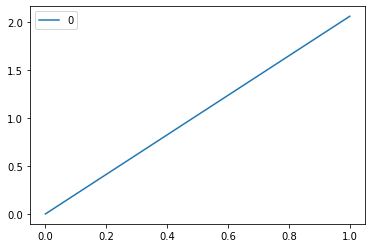

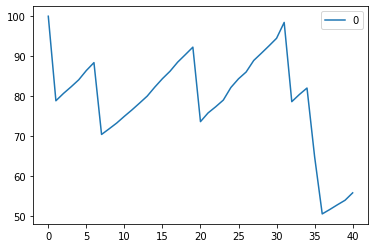

In [153]:
def long(candle):
    i = candle.index[0]
    if df["EMA100"][i] > df["close"][i] > df["EMA110"][i] > df["EMA120"][i] > df["EMA130"][i] > df["EMA140"][i] > df["EMA150"][i]:
        return True
    return False
back = Backtest(100, df, 2, 0.01, 0.1)
result = back.backtest_long(long)
print("Taux de reussite => {}%".format(round((sum(result["win_rate"]) / len(result["win_rate"]))*100,2)))
print("Nombre de trades => {}".format(len(result["win_rate"])))
pd.DataFrame(result["saved"]).plot()
pd.DataFrame(result["wallet"]).plot()

In [151]:
dt.datetime.fromtimestamp(candles[0][0]/1000)

datetime.datetime(2022, 8, 18, 0, 30)